# **REGRESSÃO POLINOMIAL**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carrega a base de dados
from google.colab import files
uploaded = files.upload()

Saving comissao.xlsx to comissao.xlsx


In [3]:
vendas = pd.read_excel('comissao.xlsx')

## **ANÁLISE INICIAL**

In [4]:
vendas.head(10)

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900
5,6,958
6,7,1022
7,8,1092
8,9,1168
9,10,1250


In [5]:
vendas.tail()

,quantidade,comissao
45,46,8198
46,47,8502
47,48,8812
48,49,9128
49,50,9450


In [6]:
vendas.shape

(50, 2)

In [7]:
vendas.dtypes

quantidade    int64
comissao      int64
dtype: object

In [8]:
vendas = vendas.astype({"comissao":float})

In [9]:
vendas.dtypes

quantidade      int64
comissao      float64
dtype: object

**Valores Missing (NAN)**

In [10]:
vendas.isnull().sum()

quantidade    0
comissao      0
dtype: int64

**Gráfico para análise inicial**

In [11]:
import matplotlib.pyplot as plt

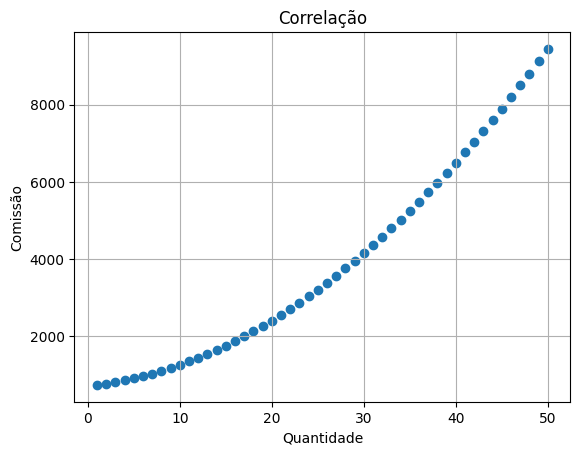

In [12]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

**NORMALIDADE**

In [13]:
import scipy.stats as stats

Teste Shapiro-Wilk

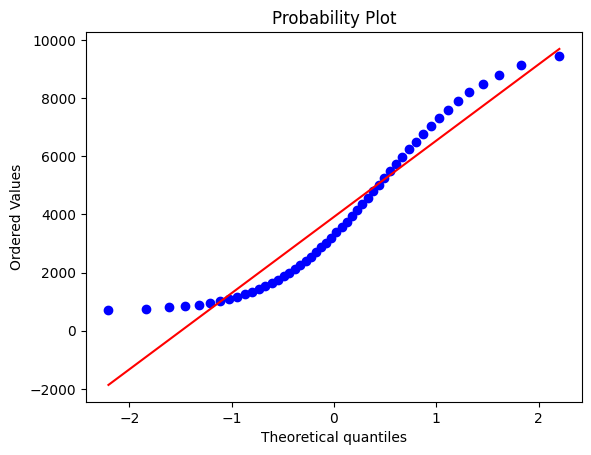

In [14]:
stats.probplot(vendas['comissao'], dist='norm', plot=plt)
plt.show()

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [15]:
estatistica, p = stats.shapiro(vendas.comissao)
print(p)

0.0012719858204945922


**Correlação Linear**

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [22]:
coef, p = stats.pearsonr(vendas.quantidade, vendas.comissao)

In [23]:
coef

0.9771727342426183

In [24]:
p

5.979169551433498e-34

**Regressão Linear**

In [25]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [26]:
regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()

In [27]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           5.98e-34
Time:                        22:10:57   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**Equação: Comissão = -626 + 178.quantidade**

**R^2 ajustado = 0,954**

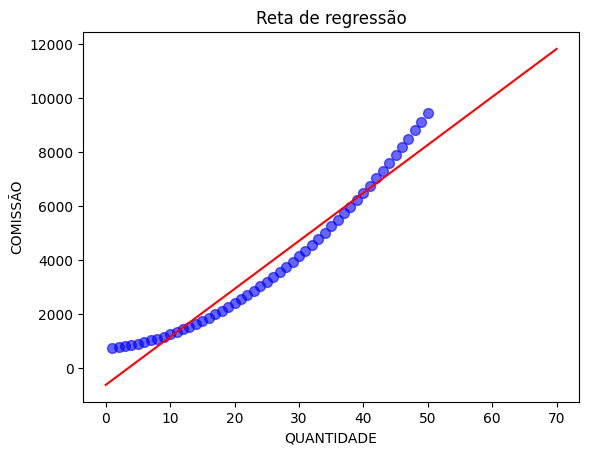

In [28]:
plt.scatter(y=vendas.comissao, x=vendas.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('COMISSÃO')
plt.xlabel('QUANTIDADE')
plt.show()

# **REGRESSÃO POLINOMIAL COM NUMPY - GRAU 2**

**y = b0 + b1.x + b2.x^2**

In [29]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))

In [30]:
y2 = modelo2(vendas.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [31]:
modelo2.coef

array([  3.,  25., 700.])

In [32]:
print("Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2".format(modelo2.coef[2], modelo2.coef[1], modelo2.coef[0]))

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2


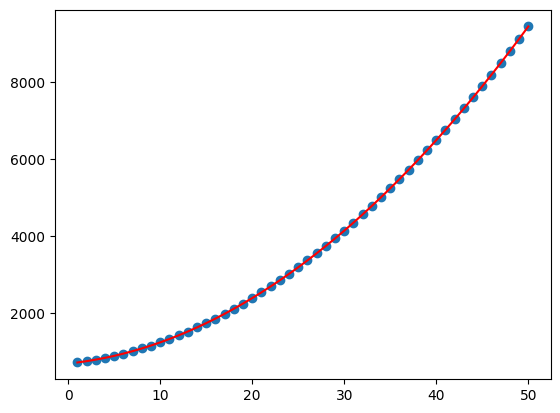

In [33]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y2, color='red')

# **REGRESSÃO POLINOMIAL COM NUMPY- GRAU 3**

**y = b0 + b1.x + b2.x^2 + b3.x^3**

In [34]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))

In [35]:
y3 = modelo3(vendas.quantidade)
y3

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [36]:
modelo3.coef

array([3.78115434e-17, 3.00000000e+00, 2.50000000e+01, 7.00000000e+02])

In [37]:
print("Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2 + {:.1f}*quantidade^3".format(modelo3.coef[3], modelo3.coef[2], modelo3.coef[1], modelo3.coef[0]))

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2 + 0.0*quantidade^3


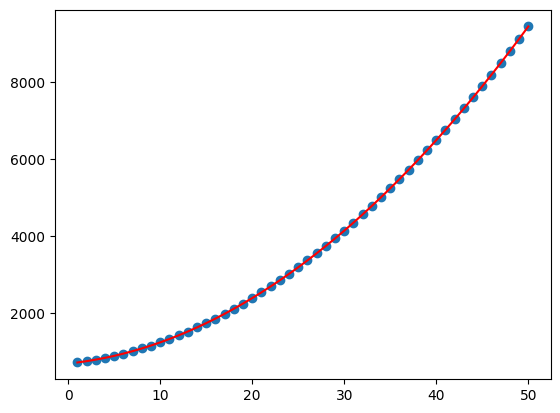

In [38]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y3,color='red');

# **REGRESSÃO POLINOMIAL COM SKLEARN**

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [40]:
# Pré Processamento
pre_process = PolynomialFeatures(degree=2)

In [41]:
x = vendas[['quantidade']]
y = vendas.comissao

In [42]:
x.head()

,quantidade
0,1
1,2
2,3
3,4
4,5


In [43]:
x_poly = pre_process.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.76

**Criação do modelo**

In [44]:
modelo_sk = LinearRegression()

In [45]:
modelo_sk.fit(x_poly, y)

LinearRegression()

In [46]:
y_pred = modelo_sk.predict(x_poly)

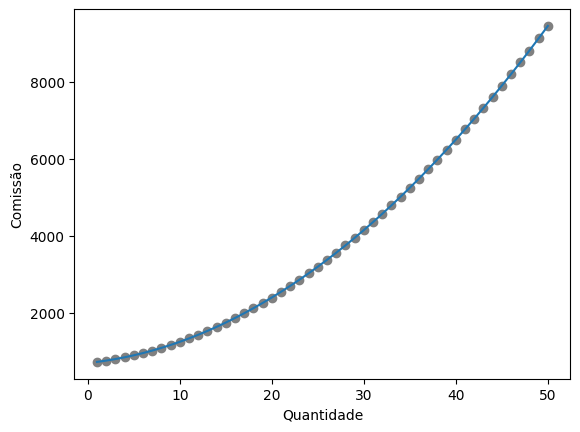

In [47]:
plt.scatter(x, y, c = "gray")
plt.xlabel("Quantidade")
plt.ylabel("Comissão")
plt.plot(x, y_pred);

In [48]:
modelo_sk.coef_

array([ 0., 25.,  3.])

In [49]:
modelo_sk.intercept_

700.0000000000059

In [50]:
print("Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2".format(modelo_sk.intercept_, modelo_sk.coef_[1], modelo_sk.coef_[2]))

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2


**Previsão**

In [51]:
quantidade = 72
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print("Se vender {}, irá ganhar {:.2f} reais de comissão".format(quantidade, previsao[0]))


Se vender 72, irá ganhar 18052.00 reais de comissão


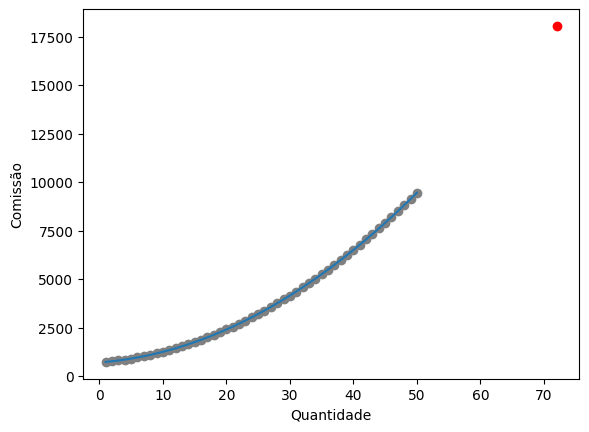

In [52]:
# Gráfico com valor previsto
plt.scatter(x, y, c = "gray")
plt.xlabel("Quantidade")
plt.ylabel("Comissão")
plt.plot(x, y_pred)
plt.scatter(72, previsao, c = "red");

**Avaliação do modelo**

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [54]:
# Erro médio quadrático (MSE)
mean_squared_error(y, y_pred)

7.633584584157331e-24

In [55]:
# Erro médio absoluto (MAE)
mean_absolute_error(y, y_pred)

2.3669599613640458e-12